### 【BeautifulSoup 패키지】
- 뷰티플 수프는 HTML과 XML 문서를 파싱하기위한 파이썬 패키지입니다. 웹 스크래핑에 유용한 HTML에서 데이터를 추출하는 데 사용할 수있는 구문 분석 된 페이지에 대한 구문 분석 트리를 생성합니다.
- from bs4 import BeautifulSoup     로 모듈을 실행합니다.  모듈 에러시 모듈을 !pip install beautifulsoup4 로 설치합니다.
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/


코랩 드라이브 마운트는 코랩폴더를 동기화 하는 작업

좌측에 있는 드라이브 마운트 아이콘 클릭하면

마운트 하는 코드가 나오거나

알아서 마운트함

In [ ]:
pip install googletrans==4.0.0-rc1


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# 폴더경로 설정
cd/content/drive/MyDrive/텍스트 마이닝

/content/drive/MyDrive/텍스트 마이닝


In [31]:
#폴더내에 파일확인
ls

'2_크롤링기초복습 및 미술관옆 동물원 html 시나리오.ipynb'
 Untitled0.ipynb
'미술관옆동물원(시나리오샘플국립국어원).html'


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install konlpy
#한글 형태소 분석기

In [1]:
test_html = """<html> \
            <body> \
                <h1 id='title'>[1]크롤링이란?</h1> \
                <p class='cssstyle'>웹페이지에서 필요한 데이터를 추출하는 것</p> \
                <p id='body' align='center'>파이썬을 중심으로 다양한 웹크롤링 기술 발달</p> \
            </body> \
        </html>"
"""

In [2]:
#########################
## 미션
## test_html을 bs4모듈에서 불러오고 print합니다..(파싱)
from bs4 import BeautifulSoup
soup = BeautifulSoup(test_html, "html.parser")
soup

<html> <body> <h1 id="title">[1]크롤링이란?</h1> <p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p> <p align="center" id="body">파이썬을 중심으로 다양한 웹크롤링 기술 발달</p> </body> </html>"

In [3]:
#########################
## 미션
## 처음나오는 p 태그를 검색하고 그 태그의 텍스트를 표시합니다.

tagFind=soup.find('p')
re=tagFind.string
re

'웹페이지에서 필요한 데이터를 추출하는 것'

### 【html에서 추출한 데이터에서 형태소분석을 하였습니다.】

In [4]:
#########################
## 미션
## <h1> , <P> 태그의 내용을 검색하는 for를 작성합니다.
## html_h1 과 html_p 변수에  각 내용을 저장합니다.
html_h1=0 ; html_p=0
list=['h1','p']

for i in list:
    tagFind=soup.find(i)  # 맨위에 나와 있는 첫번째 자료만 찾기
    re=tagFind.string
    if i=='h1':
        html_h1=re
    elif i=='p':
        html_p=re

print("html_h1 의 변수 내용은==>",html_h1)
print("html_p 의 변수 내용은==>",html_p)



html_h1 의 변수 내용은==> [1]크롤링이란?
html_p 의 변수 내용은==> 웹페이지에서 필요한 데이터를 추출하는 것


In [ ]:
#########################
## ## 저장된 html_h1과 html_P 태그를 형태소 분석을 실시하면 자동 list가 됩니다.
##
### okt의 명사단위로 나누세요

from konlpy.tag import Okt
okt=Okt()

print('\n--------- 형태소 분석 -----------')
print(okt.morphs(html_h1))
print(okt.morphs(html_p))

print('\n---------명사 -----------')
print(okt.nouns(html_h1))
print(okt.nouns(html_p))

print('\n--------품사 태깅 -----------')
print(okt.pos(html_h1))
print(okt.pos(html_p))

print('\n--------품사 태깅중 Noun만 추출합니다. -----------')
pos_=okt.pos(html_p) ; noun_=[]

for i in pos_:
    if i[1]=='Noun':
        noun_.append(i)
print(noun_)


print('\n\n--(참고: 1109일 토요일 자료) 위의 for 구문을 아래와 같이 한줄로 작성가능합니다. ---')

ttt=[i for i in pos_ if i[1]=='Noun']
print(ttt)

In [6]:
ttt

[('웹페이지', 'Noun'), ('데이터', 'Noun'), ('추출', 'Noun'), ('것', 'Noun')]

In [7]:
import pandas as pd

word=[i[0] for i in pos_]
mor=[i[1] for i in pos_]

dict_data={'word':word,'품사':mor}
db=pd.DataFrame(dict_data)
db

,word,품사
0,웹페이지,Noun
1,에서,Josa
2,필요한,Adjective
3,데이터,Noun
4,를,Josa
5,추출,Noun
6,하는,Verb
7,것,Noun


In [8]:
#########################
## 미션
## p 태그의 모든 텍스트를 출력합니다.
### 모든 텍스트를 갖고옴
### 태그를 제외하고 텍스트만 출력하는 명령어는 get_text
## get_text는 문자열만 출력가능, 리스트 통으로 출력 불가능
태그포함=soup.find_all('p')
print(태그포함,'\n\n')

for i in 태그포함:
    print(i.get_text())

#위의 구문을 한줄로 변형해보세요.
ttt=[i for i in pos_ if i[1]=='Noun']

[<p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p>, <p align="center" id="body">파이썬을 중심으로 다양한 웹크롤링 기술 발달</p>] 


웹페이지에서 필요한 데이터를 추출하는 것
파이썬을 중심으로 다양한 웹크롤링 기술 발달


In [9]:
#########################
## 미션
## p 태그중  class='cssstyle' 인 내용만 출력합니다.

soup.find_all('p',attrs={'class':'cssstyle'})

[<p class="cssstyle">웹페이지에서 필요한 데이터를 추출하는 것</p>]

### [미술관옆 동물원 시나리오.htm] 분석 워드클라우드


In [ ]:
from bs4 import BeautifulSoup

with open("미술관옆동물원(시나리오샘플국립국어원).html", encoding='cp949') as fp:
    soup = BeautifulSoup(fp, 'html.parser')
soup


In [11]:
## 등장인물 출력
castitem=soup.find_all('castitem')
castitem_=[i.get_text() for i in castitem]
print(castitem_)

## castitem_=[i.get_text() for i in castitem] 은
## 아래의 for 구문과 같음
# castitem_=[]
# for i in castitem:
#     castitem_.append(i)

print('등장인물은 총 몇명?' , len(castitem_))


['이춘희', '한철수', '현실의 인공 ― 상상의 인공', '현실의 다혜 ― 상상의 다혜', '집주인', '국회의원', '젊은 보좌관', '신랑, 신부 1쌍', '신혼부부', '중년부부', '노년부부', '중년부부의 아이들']
등장인물은 총 몇명? 12


춘희는 몇번 등장했나?

등장인물(castList)은 각각 몇번 등장했는지를 집계하고, 건수 및 백분율 출력

시각화도 진행


<speaker> 태그 기준 등장인물 등장 횟수:
신부:: 1번
신랑:: 1번
춘희소리:: 29번
의원:: 4번
보좌관:: 3번
춘희:: 304번
젊은 보좌관:: 2번
아줌마:: 12번
철수:: 312번
중년부인소리:: 1번
부인소리:: 2번
여자소리:: 1번
소리:: 11번
다혜:: 52번
둘:: 2번
철수소리:: 34번
인공:: 34번
다혜독백:: 3번
남편:: 3번
아내:: 3번
할머니:: 2번
할아버지 소리:: 1번
할아버지:: 2번
할머니소리:: 1번
유다혜소리:: 1번
응답기:: 2번
춘희독백:: 1번


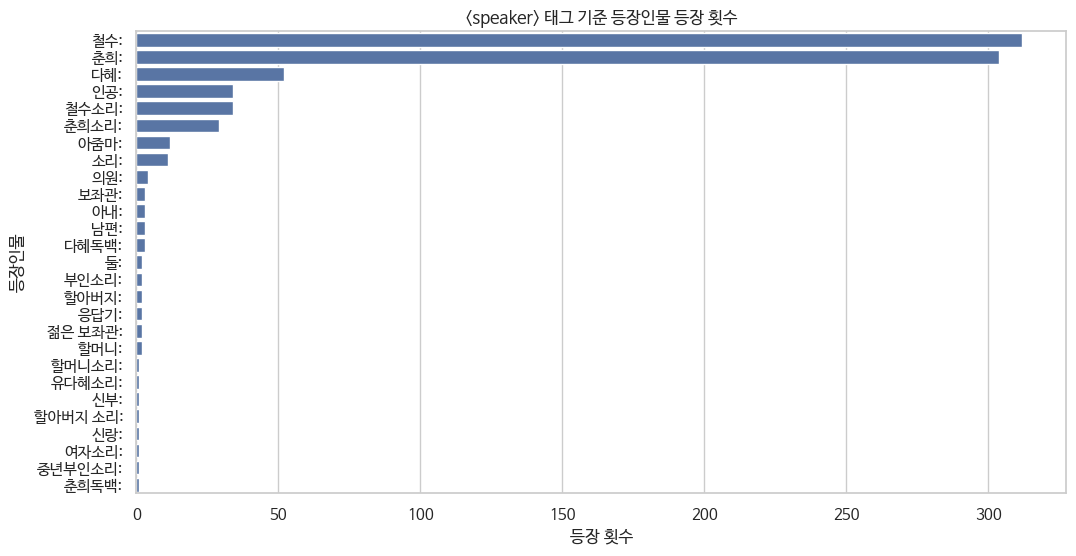

In [12]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# HTML 파일 로드
with open("미술관옆동물원(시나리오샘플국립국어원).html", encoding='cp949') as fp:
    soup = BeautifulSoup(fp, 'html.parser')

# 'speaker' 태그 찾기
speakers = soup.find_all('speaker')

# 'speaker' 태그의 텍스트 추출
speaker_texts = [speaker.get_text(strip=True) for speaker in speakers]

# 작업 1: 특정 등장인물 등장 횟수 계산 ('<speaker>' 태그 기준)
character_counts = {}
for speaker_text in speaker_texts:
    character_counts[speaker_text] = character_counts.get(speaker_text, 0) + 1

# 작업 2: 등장인물 등장 횟수 출력
print("\n<speaker> 태그 기준 등장인물 등장 횟수:")
for character, count in character_counts.items():
    print(f"{character}: {count}번")
# 작업 3: 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.rc('font', family='NanumBarunGothic')
sns.countplot(y=speaker_texts, order=pd.Series(speaker_texts).value_counts().index)
plt.title("<speaker> 태그 기준 등장인물 등장 횟수")
plt.xlabel("등장 횟수")
plt.ylabel("등장인물")
plt.show()


담배가 나오는 라인넘버를 찾고, 그 라인넘버를 속하는 scnum을 찾아서 출력


In [14]:
### '담배'가 나오는 scnum넘버 찾기
from bs4 import BeautifulSoup

with open("미술관옆동물원(시나리오샘플국립국어원).html", encoding='cp949') as fp:
    soup = BeautifulSoup(fp, 'html.parser')

# 모든 <scnum> 엘리먼트를 찾기
all_scnum_elements = soup.find_all('scnum')

# 각 <scnum> 엘리먼트에 대해 반복
for scnum_element in all_scnum_elements:
    # 해당하는 <stage> 엘리먼트 찾기
    stage_element = scnum_element.find_next('stage')

    # <stage> 엘리먼트가 존재하고, 텍스트에 "담배"가 포함되어 있는지 확인
    if stage_element and '담배' in stage_element.get_text():
        # 해당하는 <scnum> 엘리먼트 출력 또는 저장
        print(scnum_element.get_text())


S 17 노천 카페
S 51 카페


### 각 신에 해당하는 자료요약(요약을 못하면 그냥 자료를 연결해서 문장화해서, 영어로 변경하고, 칼로 호출해서) 이미지화 하기

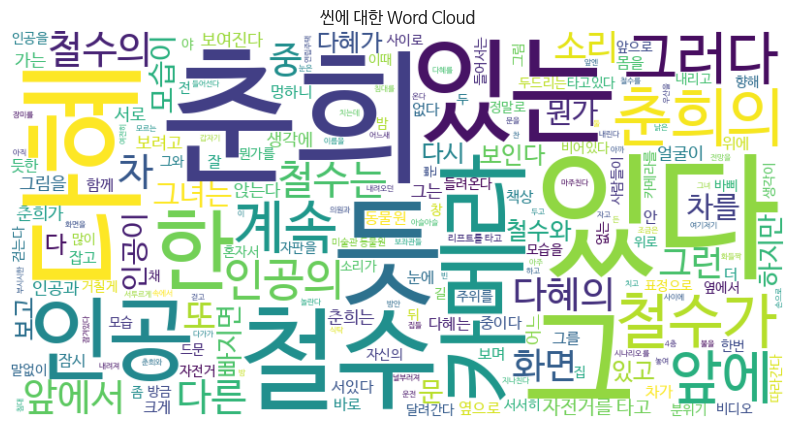

In [32]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# HTML 파일 읽기
with open("미술관옆동물원(시나리오샘플국립국어원).html", encoding='cp949') as fp:
    soup = BeautifulSoup(fp, 'html.parser')

# 각 신에 대한 정보를 담을 딕셔너리 생성
gods_data = {}

# 모든 <scnum> 엘리먼트 찾기
all_scnum_elements = soup.find_all('scnum')

# 각 <scnum> 엘리먼트에 대해 반복
for scnum_element in all_scnum_elements:
    # scnum과 stage 번호 가져오기
    scnum = scnum_element.get_text().strip()
    stage_element = scnum_element.find_next('stage')

    # stage 엘리먼트가 존재하면 텍스트 가져오기
    if stage_element:
        stage_text = stage_element.get_text().strip()

        # 해당 신에 대한 정보를 딕셔너리에 저장
        gods_data[scnum] = stage_text

# 텍스트 데이터 가져오기
text_data = ' '.join(gods_data.values())

# WordCloud 생성 (한글 폰트 지정)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path='NanumBarunGothic.ttf',  # Specify the path to the NanumBarunGothic font
).generate(text_data)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('씬에 대한 Word Cloud')
plt.show()


불용어 제거

In [23]:
# Define stopwords
stop_words = set([
    '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를',
    '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로',
    '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라',
    '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다',
    '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '일때', '할때',
    '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다',
    '할수있다', '할수있어', '임에', '틀림없다', '한 경우', '한 이상', '얼마든지', '같다', '비슷하다',
    '예컨대', '이럴정도로', '어떻게 만약', '만일', '위에서 서술한바와같이', '인 듯하다', '하지 않는다면',
    '만약에', '무엇', '무슨', '어느것', '어느해', '어느 년도', '라 해도', '언젠가', '어떤것',
    '어느것', '저기', '저쪽', '저것', '그때', '그럼에도', '게다가', '더구나', '하물며', '와르르', '팍',
    '퍽', '펄렁', '동안', '이래', '하고있었다', '이었다', '에', '로부터', '까지', '예하면', '했어요',
    '해요', '함께', '같이', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로',
    '당장', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꾸어 말하면', '즉', '구체적으로',
    '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다',
    '게다가', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로',
    '당장', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꾸어 말하면', '즉', '구체적으로',
    '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다',
    '게다가', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로',
    '당장', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꾸어 말하면', '즉', '구체적으로',
    '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다',
    '게다가', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로',
    '당장', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꾸어 말하면', '즉', '구체적으로',
    '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다',
    '게다가', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로',
    '당장', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꾸어 말하면', '즉', '구체적으로',
    '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다',
    '게다가', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로',
    '당장', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꾸어 말하면', '즉', '구체적으로',
    '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다',
    '게다가', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로',
    '당장', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꾸어 말하면', '즉', '구체적으로',
    '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다',
    '게다가', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로',
    '당장', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꾸어 말하면', '즉', '구체적으로',
    '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다',
    '게다가', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로',
    '당장', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꾸어 말하면', '즉', '구체적으로',
    '말하자면', '시작하여', '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다',
    '게다가'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


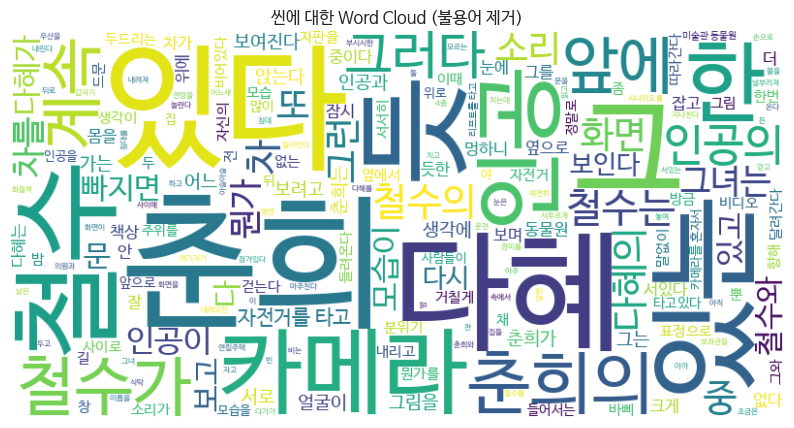

In [33]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords dataset if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# HTML 파일 읽기
with open("미술관옆동물원(시나리오샘플국립국어원).html", encoding='cp949') as fp:
    soup = BeautifulSoup(fp, 'html.parser')

# 각 신에 대한 정보를 담을 딕셔너리 생성
gods_data = {}

# 모든 <scnum> 엘리먼트 찾기
all_scnum_elements = soup.find_all('scnum')

# 각 <scnum> 엘리먼트에 대해 반복
for scnum_element in all_scnum_elements:
    # scnum과 stage 번호 가져오기
    scnum = scnum_element.get_text().strip()
    stage_element = scnum_element.find_next('stage')

    # stage 엘리먼트가 존재하면 텍스트 가져오기
    if stage_element:
        stage_text = stage_element.get_text().strip()

        # 해당 신에 대한 정보를 딕셔너리에 저장
        gods_data[scnum] = stage_text

# 텍스트 데이터 가져오기
text_data = ' '.join(gods_data.values())

# Remove stopwords
word_tokens = word_tokenize(text_data)
filtered_text = ' '.join([word for word in word_tokens if word.lower() not in stop_words])

# WordCloud 생성 (한글 폰트 지정)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path='NanumBarunGothic.ttf',  # Specify the path to the NanumBarunGothic font
).generate(filtered_text)

# 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('씬에 대한 Word Cloud (불용어 제거)')
plt.show()


In [20]:

### 그 자료를 스케치로 변경(openCv)하고 신넘버와, 내용 저장하기


명사단위 워드클라우드


 몇신? 103

--------- 형태소 분석 -----------


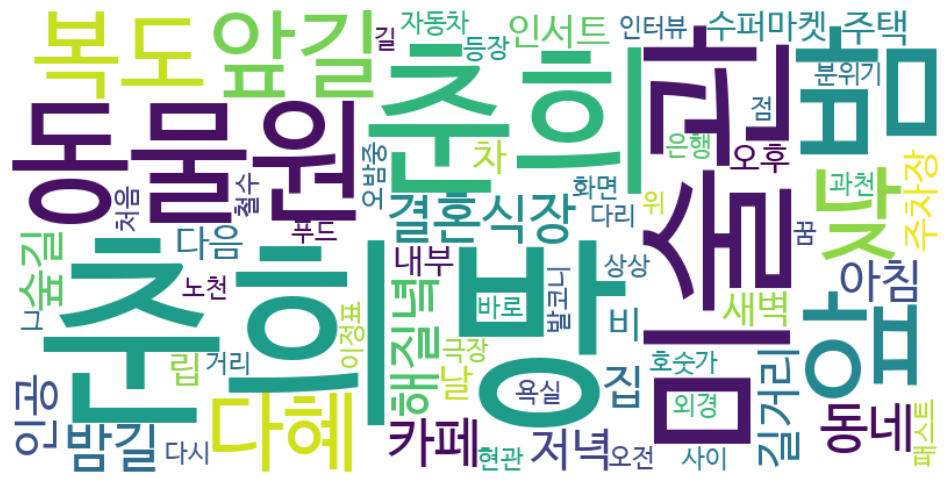

In [35]:
# 신넘버 제목만 출력하고 몇개의 신이 있는 지 출력
scnum=soup.find_all('scnum')
scnum_=[i.get_text() for i in scnum]
print('\n 몇신?' , len(scnum_))
#scnum_

# 명사단위로 나누어서 워드클라우드 하려함
from konlpy.tag import Okt
okt=Okt()

print('\n--------- 형태소 분석 -----------')
# scnumStr=''
# for li in scnum_:
#    scnumStr=scnumStr+li

# scnumStr
# okt.nouns(scnumStr)

명사추출=okt.nouns(scStr)

scStr=' '.join(명사추출)  #for와 같음. join구문에서는 변수 초기화안해도됨

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# WordCloud 생성 (한글 폰트 지정)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path='NanumBarunGothic.ttf',  # Specify the path to the NanumBarunGothic font
).generate(filtered_text)

wordcloud = wordcloud.generate(scStr)      # str자료만 가능, list자료는 안됨

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [36]:
# 파이썬이 제공하는 count 함수 를 사용할때는
# 자료가 리스트구조여야함.

from collections import Counter
#다시리스트로=명사추출.split(' ')
Counter(명사추출).most_common(10)  #상위10개

[('춘희', 40),
 ('방', 25),
 ('미술관', 15),
 ('밤', 14),
 ('동물원', 12),
 ('앞', 11),
 ('낮', 7),
 ('복도', 6),
 ('앞길', 6),
 ('다혜', 5)]

## Counter를 직접 만들수도 있습니다.
- #검색하는명사=명사추출

# 단어중복 없애고 단일값만 가져가는 방법
-  단어유일기억리스트=[] ; 있음=0
- for i in 명사추출:
-     for j in 단어유일기억리스트:
-        if i==j:
-            있음=있음+1
-    if 있음=0:
-        단어유일기억리스트.append(i)
        

- cnt=0
- for i in 명사추출:
-    for 명사리스트 in 명사추출:
-        if i==명사리스트:
-            cnt=cnt+1
-    print(i + "---->"+ str(cnt))

## stage 태그의 내용만 찾아서
## 워드클라우드 작업 실행해보세요

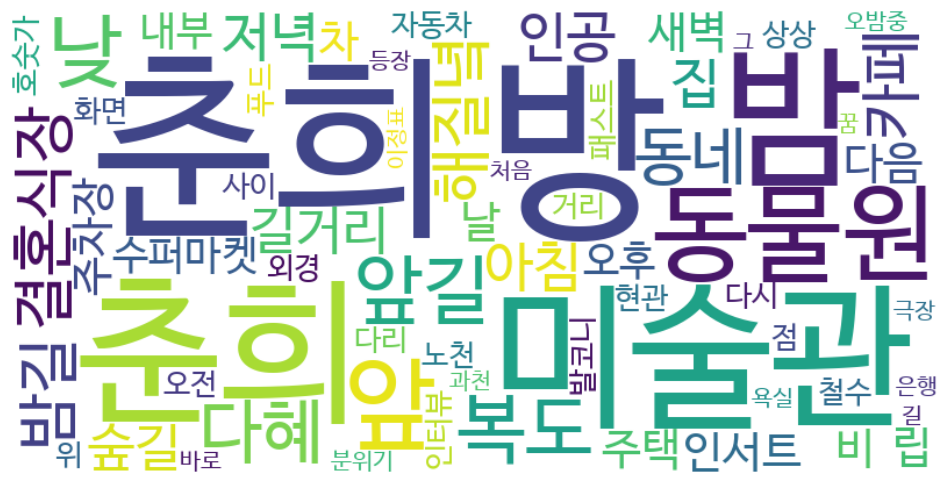

In [39]:
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# HTML 파일 읽기
with open("미술관옆동물원(시나리오샘플국립국어원).html", encoding='cp949') as fp:
    soup = BeautifulSoup(fp, 'html.parser')

# stage 태그의 내용 추출
stage_elements = soup.find_all('stage')
stage_contents = [element.get_text().strip() for element in stage_elements]

# stage_contents를 공백으로 연결하여 문자열로 만들기
stage_text = ' '.join(stage_contents)

# 형태소 분석
okt = Okt()
nouns = okt.nouns(stage_text)

# 명사들을 공백으로 연결하여 문자열로 만들기
stage_str = ' '.join(nouns)
# WordCloud 생성 (한글 폰트 지정)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path='NanumBarunGothic.ttf',  # Specify the path to the NanumBarunGothic font
).generate(filtered_text)

wordcloud = wordcloud.generate(scStr)      # str자료만 가능, list자료는 안됨

# 시각화
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
